# Lab 2 

In [13]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd

df = pd.read_csv("s3://ia340-connor-jmu/Warehouse_and_Retail_Sales.csv") # load the data from s3

In [14]:
df.head() #Shows 5 rows starting with 0 

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [15]:
df.shape

(307645, 9)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB


df.describe(include='all')  # The data seems clean but has some missing values.

In [19]:
df.rename(columns={'ITEM CODE': 'CODE'}, inplace=True)

In [27]:
df.isnull().sum()  #Renamed column: `Item code` 'CODE` 38 Missing values were found. I handled missing values by **dropping rows** with nulls.

YEAR                0
MONTH               0
SUPPLIER            0
CODE                0
ITEM DESCRIPTION    0
ITEM TYPE           0
RETAIL SALES        0
RETAIL TRANSFERS    0
WAREHOUSE SALES     0
dtype: int64

Renamed column: `Item code` 'CODE` 38 Missing values were found. I handled missing values by **dropping rows** with nulls.

In [26]:
df['CODE'].fillna('Unknown', inplace=True)

In [28]:
df['RETAIL SALES']

0          0.00
1          0.00
2          0.00
3          0.00
4          0.82
          ...  
307639     5.50
307640     0.00
307641    66.12
307642     2.25
307643    20.50
Name: RETAIL SALES, Length: 307477, dtype: float64

In [35]:
df[5:11]

,YEAR,MONTH,SUPPLIER,CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
5,2020,1,KYSELA PERE ET FILS LTD,100641,CORTENOVA VENETO P/GRIG - 750ML,WINE,2.76,0.0,6.0
6,2020,1,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.08,1.0,1.0
7,2020,1,BROWN-FORMAN BEVERAGES WORLDWIDE,1008,JACK DANIELS COUNTRY COCKTAIL SOUTHERN PEACH -...,BEER,0.00,0.0,2.0
8,2020,1,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,6.41,4.0,0.0
9,2020,1,INTERNATIONAL CELLARS LLC,101117,KSARA CAB - 750ML,WINE,0.33,1.0,2.0
10,2020,1,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,1.70,1.0,0.0


df_filtered.head() # I selected the column ColumnName to examine individual values.

The data was sorted based on YEar to see trends .

I sliced rows 5 through 10 to get a manageable sample of the data.

I filtered rows where RETIL SALE, which helped isolate records that meet a specific condition

In [52]:
df.groupby('YEAR')['RETAIL SALES'].mean().reset_index()

,YEAR,RETAIL SALES
0,2017,7.134015
1,2018,5.809444
2,2019,6.916169
3,2020,7.677231


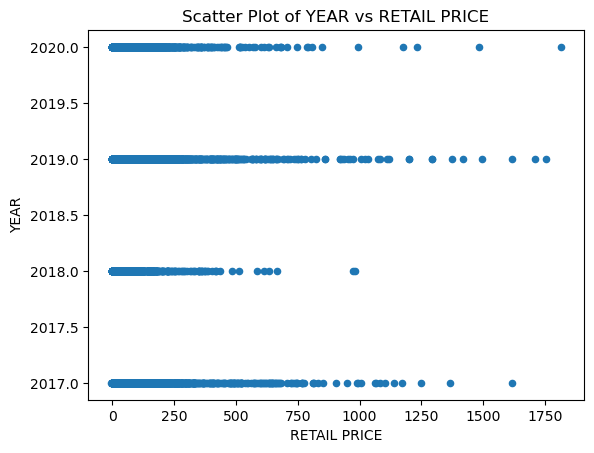

In [61]:
df.plot(x='RETAIL SALES', y='YEAR', kind='scatter')
plt.title('Scatter Plot of YEAR vs RETAIL PRICE')
plt.xlabel('RETAIL PRICE')
plt.ylabel('YEAR')
plt.show()

This scatter plot shows the relationship between year and price.
A positive trend can be seen, meaning a possible correlation. There may also be outliers or clusters worth exploring further.